In [230]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
admissions = pd.read_csv('ADMISSIONS.csv', parse_dates = [['ADMITTIME','DISCHTIME']])
diag_groups = pd.read_csv('DRGCODES.csv')
patients = pd.read_csv('PATIENTS.csv')
procs = pd.read_csv('PROCEDURES_ICD.csv')
diags = pd.read_csv('DIAGNOSES_ICD.csv')
prescript = pd.read_csv('PRESCRIPTIONS.csv')
# not developed yet, but likely to use
stats = pd.read_csv('CHARTEVENTS.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [231]:
# preview content (uncomment as necessary - only last active line will show)
#admissions.head(10)
#diag_groups.head(10)
#patients.head(10)
#procs.head(10)
#diags.head(10)
#prescript.head(10)
#stats.head(10)

In [232]:
# dropping all unnecessary columns
admissions = admissions.drop(columns = ['ADMITTIME_DISCHTIME', 'ROW_ID', 'DEATHTIME', 'ADMISSION_LOCATION',
                                        'DISCHARGE_LOCATION', 'LANGUAGE', 'MARITAL_STATUS', 'EDREGTIME', 'EDOUTTIME',
                                       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'])
diag_groups = diag_groups.drop(columns = ['ROW_ID', 'DRG_SEVERITY', 'DRG_MORTALITY'])
patients = patients.drop(columns = ['ROW_ID', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG'])
procs = procs.drop(columns = ['ROW_ID', 'SEQ_NUM'])
diags = diags.drop(columns = ['ROW_ID', 'SEQ_NUM'])
prescript = prescript.drop(columns = ['ROW_ID', 'ICUSTAY_ID', 'STARTDATE', 'ENDDATE', 'DRUG_TYPE', 'DRUG_NAME_POE',
                                      'DRUG_NAME_GENERIC', 'GSN', 'NDC', 'PROD_STRENGTH', 'FORMULARY_DRUG_CD'])
stats = stats.drop(columns = ['ROW_ID', 'ICUSTAY_ID', 'ITEMID', 'STORETIME', 'CGID', 'WARNING', 'ERROR',
                              'RESULTSTATUS', "STOPPED"])

In [203]:
# EDA preparation - extract info and compartmentalize into different dataframes
eda_admit_type_df = admissions.iloc[:,2]
eda_insurance_df = admissions.iloc[:,3]
eda_religion_df = admissions.iloc[:,4]
eda_ethnicity_df = admissions.iloc[:,5]
eda_gender_df = patients.iloc[:,1]
eda_drugs_df = prescript.iloc[:,2]

Text(0.5,1,'Admission type by patient')

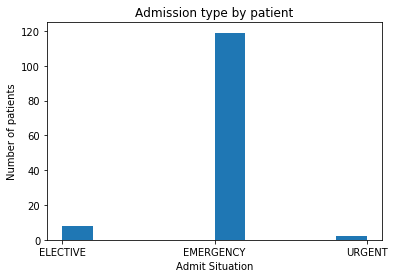

In [204]:
# admission type histogram
plt.hist(eda_admit_type_df.values)
plt.xlabel('Admit Situation')
plt.ylabel('Number of patients')
plt.title('Admission type by patient')

Text(0.5,1,'Insurance type by patient')

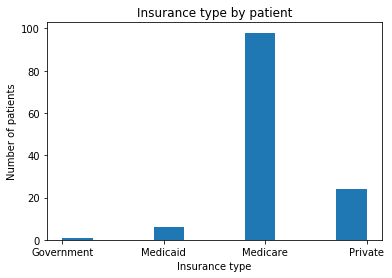

In [205]:
# insurance type histogram
plt.hist(eda_insurance_df.values)
plt.xlabel('Insurance type')
plt.ylabel('Number of patients')
plt.title('Insurance type by patient')

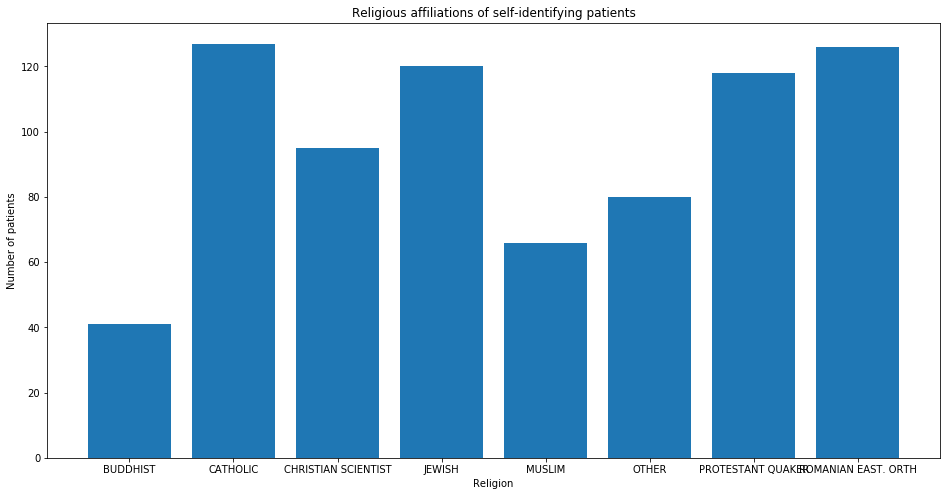

In [206]:
# religion histogram
eda_religion_df = eda_religion_df.replace('NOT SPECIFIED',np.NaN)
eda_religion_df = eda_religion_df.replace('nan', np.NaN)
eda_religion_df = eda_religion_df.replace('UNOBTAINABLE', np.NaN)
eda_religion_df = eda_religion_df.dropna(axis=0)
fig, ax = plt.subplots(1, figsize = (16,8))
ax.bar(eda_religion_df, eda_religion_df.index)
plt.xlabel('Religion')
plt.ylabel('Number of patients')
plt.title('Religious affiliations of self-identifying patients')
plt.show()

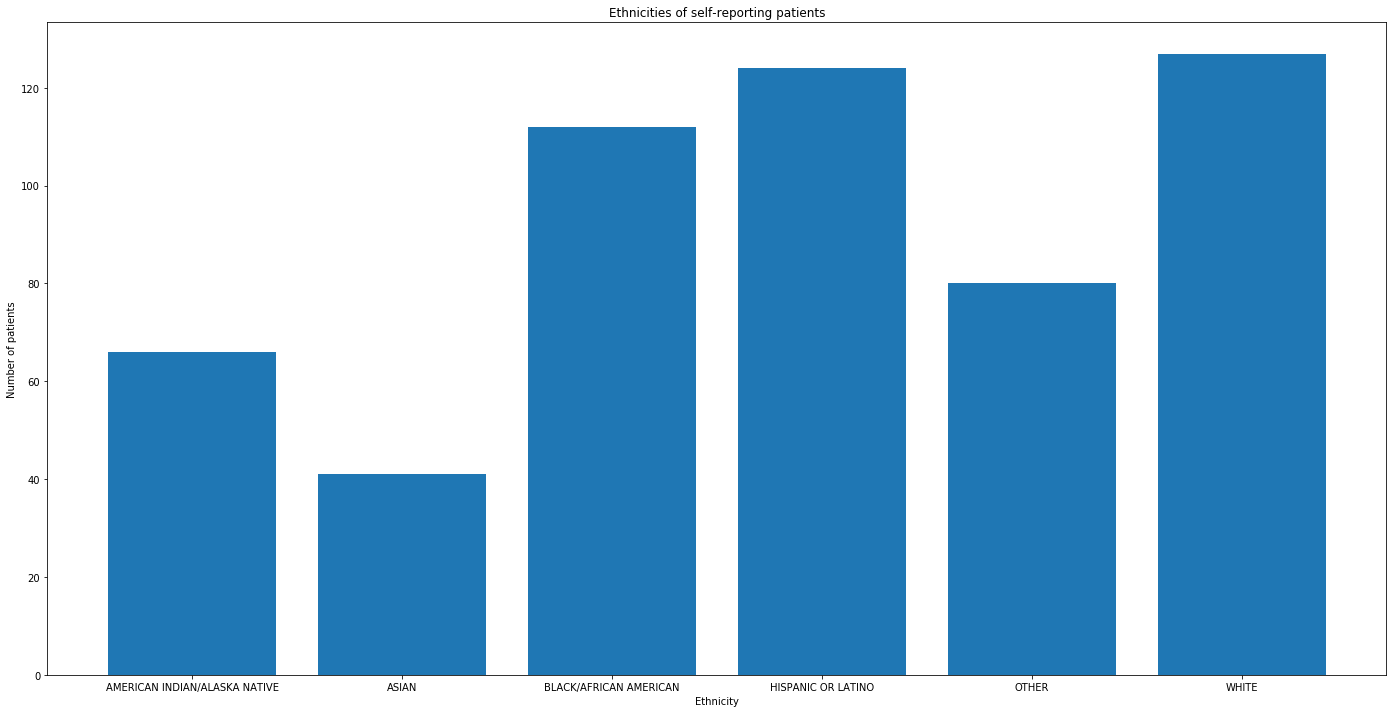

In [207]:
# ethnicity histogram
eda_ethnicity_df = eda_ethnicity_df.replace('UNKNOWN/NOT SPECIFIED', np.NaN)
eda_ethnicity_df = eda_ethnicity_df.replace('UNABLE TO OBTAIN', np.NaN)
eda_ethnicity_df = eda_ethnicity_df.replace('AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE', 'AMERICAN INDIAN/ALASKA NATIVE')
eda_ethnicity_df = eda_ethnicity_df.replace('HISPANIC/LATINO - PUERTO RICAN', 'HISPANIC OR LATINO')
eda_ethnicity_df = eda_ethnicity_df.replace('nan', np.NaN)
eda_ethnicity_df = eda_ethnicity_df.dropna(axis=0)
fig, ax = plt.subplots(1, figsize = (24,12))
ax.bar(eda_ethnicity_df, eda_ethnicity_df.index)
plt.xlabel('Ethnicity')
plt.ylabel('Number of patients')
plt.title('Ethnicities of self-reporting patients')
plt.show()

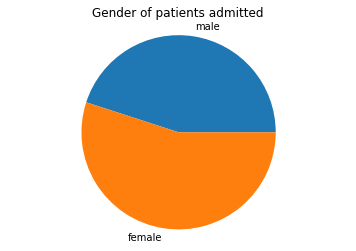

In [208]:
# patient gender piechart
eda_gender_df = eda_gender_df.replace('M',1)
eda_gender_df = eda_gender_df.replace('F',0)
num_male = eda_gender_df.sum()
num_female = len(eda_gender_df.index) - num_male
sizes = [num_male, num_female]
labels = ['male', 'female']
plt.pie(sizes, labels = labels)
plt.axis('equal')
plt.title('Gender of patients admitted')
plt.show()

In [ ]:
# procedure piechart
# future work?

In [209]:
# further cleaning, post EDA
admissions = admissions.drop(columns = ['ADMISSION_TYPE', 'INSURANCE', 'RELIGION', 'ETHNICITY'])
admissions = admissions.dropna(axis=0)
diag_groups = diag_groups.dropna(axis=0)
patients = patients.dropna(axis=0)
procs = procs.dropna(axis=0)
diags = diags.dropna(axis=0)
prescript = prescript.dropna(axis=0)
stats = stats.dropna(axis=0)

In [233]:
# review content (uncomment as necessary - only last active line will show)
#admissions.head(10)
#diag_groups.head(10)
#patients.head(10)
#procs.head(10)
#diags.head(10)
prescript.head(10)
#stats.head(10)

,SUBJECT_ID,HADM_ID,DRUG,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,10061,145203,SW,150,ml,150,ml,IV
1,10061,145203,Aspirin,81,mg,1,TAB,PO
2,10061,145203,Pantoprazole,40,mg,1,TAB,PO
3,10061,145203,D5W,50,ml,50,ml,IV DRIP
4,10061,145203,Nystatin Oral Suspension,5,ml,1,UDCUP,PO
5,10061,145203,Furosemide,100,mg,1,VIAL,IV DRIP
6,10061,145203,Captopril,12.5,mg,1,TAB,PO
7,10061,145203,SW,100,ml,100,ml,IV
8,10061,145203,Magnesium Sulfate,2,gm,4,ml,IV
9,10061,145203,Magnesium Sulfate,2,gm,4,ml,IV


In [234]:
# merging these dataframes will work once we have all the data
dfnew = data1[['ROW_ID', 'DEATHTIME', 'DIAGNOSIS']]
df_data2 = data2[['ROW_ID', 'DRG_CODE']]
dfnew = pd.merge(dfnew, df_data2, on='ROW_ID', how='inner')
df_data3 = data3[['ROW_ID', 'GENDER']]
dfnew = pd.merge(dfnew, df_data3, on='ROW_ID', how='inner')
df_data4 = data4[['ROW_ID', 'ICD9_CODE']]
dfnew = pd.merge(dfnew, df_data4, on='ROW_ID', how='inner')
dfnew.dropna(axis=0)
#data5.columns = [['ICD9_CODE', 'SHORT_DESCRIPTION']]
#dfnew= pd.merge(dfnew, data5, on='ICD9_CODE', how='inner') 
#dfnew = pd.merge(dfnew)

KeyError: "['ROW_ID' 'DEATHTIME'] not in index"